In [1]:
# Import all the tools we need

# Regular EDA(Exploratory Data Analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from scikit-learn for Classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [2]:
# Loading the dataset
data = pd.read_csv("./Breastcancer.csv")
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [3]:
data.diagnosis.value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

0: Benign
1: Malignant

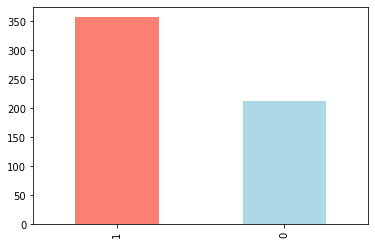

In [4]:
data.diagnosis.value_counts().plot.bar(color=["salmon", "lightblue"]);

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [6]:
data.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [7]:
data.isna().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

### Modelling

In [8]:
X = data.drop("diagnosis",axis=1)
y = data.diagnosis

In [9]:
X

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,17.99,10.38,122.80,1001.0,0.11840
1,20.57,17.77,132.90,1326.0,0.08474
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
4,20.29,14.34,135.10,1297.0,0.10030
...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100
565,20.13,28.25,131.20,1261.0,0.09780
566,16.60,28.08,108.30,858.1,0.08455
567,20.60,29.33,140.10,1265.0,0.11780


In [10]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 5), (114, 5), (455,), (114,))

In [13]:
model1 = LogisticRegression(max_iter=150)
model2 = KNeighborsClassifier(n_neighbors=10)
model3 = SVC()

model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)

y_preds1 = model1.predict(X_test)
y_preds2 = model2.predict(X_test)
y_preds3 = model3.predict(X_test)

print(accuracy_score(y_test,y_preds1))
print(accuracy_score(y_test,y_preds2))
print(accuracy_score(y_test,y_preds3))

0.9385964912280702
0.868421052631579
0.9122807017543859


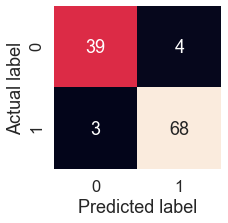

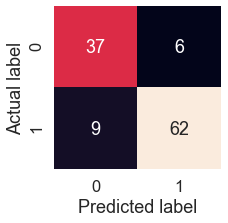

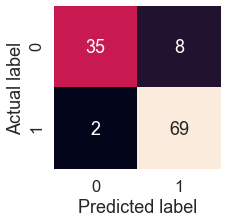

In [14]:
sns.set(font_scale=1.5)
conf_mat1 = confusion_matrix(y_test,y_preds1)
fig, ax = plt.subplots(figsize=(3,3))
ax = sns.heatmap(conf_mat1,annot=True,cbar=False)
plt.xlabel("Predicted label")
plt.ylabel("Actual label")

conf_mat2 = confusion_matrix(y_test,y_preds2)
fig, ax = plt.subplots(figsize=(3,3))
ax = sns.heatmap(conf_mat2,annot=True,cbar=False)
plt.xlabel("Predicted label")
plt.ylabel("Actual label")

conf_mat3 = confusion_matrix(y_test,y_preds3)
fig, ax = plt.subplots(figsize=(3,3))
ax = sns.heatmap(conf_mat3,annot=True,cbar=False)
plt.xlabel("Predicted label")
plt.ylabel("Actual label");

Justifying accuracy score with the formula:

**accuracy score = (True Positive + True Negative) / (True Positive + True Negative + False Positive + False Negative)**

In [15]:
(39+68)/(39+4+3+68),(37+62)/(37+6+9+62),(35+69)/(35+8+2+69)

(0.9385964912280702, 0.868421052631579, 0.9122807017543859)

**Precision = True Positive / (True Positive + False Positive) = True Positive / Total Predicted Postive**

* Precision is a good measure to determine, when the costs of False Postive is high.

**Recall = True Positive / (True Positive + False Negative) = True Positive / Total Actual Positive**

* Recall is a best measure to determine, when the costs of False Negative is high.

**F-1 Score: 2 * [ ( Precision * Recall ) / ( Precision + Recall ) ]**

* Required when we want to seek a balance between precision and recall and when there is uneven class distribution (large number of Actual Negatives).

In [16]:
# From Logistic Regression:
print(classification_report(y_test,y_preds1))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        43
           1       0.94      0.96      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [17]:
print(conf_mat1)

[[39  4]
 [ 3 68]]


In [18]:
# Justifying:
# Precision 
print(68/(68+4)) # for 1
print(39/(39+3)) # for 0
# Recall
print(68/(68+3)) # for 1
print(39/(39+4)) # for 0
# F-1 score
print(((0.94*0.96) / (0.94+0.96))*2) # for 1
print(((0.93*0.91) / (0.93+0.91))*2) # for 0

0.9444444444444444
0.9285714285714286
0.9577464788732394
0.9069767441860465
0.9498947368421051
0.9198913043478261


In [19]:
# From KNN:
print(classification_report(y_test,y_preds2))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        43
           1       0.91      0.87      0.89        71

    accuracy                           0.87       114
   macro avg       0.86      0.87      0.86       114
weighted avg       0.87      0.87      0.87       114



In [20]:
print(conf_mat2)

[[37  6]
 [ 9 62]]


In [21]:
# Justifying:
# Precision 
print(62/(62+6)) # for 1
print(37/(37+9)) # for 0
# Recall
print(62/(62+9)) # for 1
print(37/(37+6)) # for 0
# F-1 score
print(((0.91*0.87) / (0.91+0.87))*2) # for 1
print(((0.80*0.86) / (0.80+0.86))*2) # for 0

0.9117647058823529
0.8043478260869565
0.8732394366197183
0.8604651162790697
0.8895505617977528
0.8289156626506025


In [22]:
# From SVC:
print(classification_report(y_test,y_preds3))

              precision    recall  f1-score   support

           0       0.95      0.81      0.88        43
           1       0.90      0.97      0.93        71

    accuracy                           0.91       114
   macro avg       0.92      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114



In [23]:
print(conf_mat3)

[[35  8]
 [ 2 69]]


In [24]:
# Justifying:
# Precision 
print(69/(69+8)) # for 1
print(35/(35+2)) # for 0
# Recall
print(69/(69+2)) # for 1
print(35/(35+8)) # for 0
# F-1 score
print(((0.90*0.97) / (0.90+0.97))*2) # for 1
print(((0.95*0.81) / (0.95+0.81))*2) # for 0

0.8961038961038961
0.9459459459459459
0.971830985915493
0.813953488372093
0.9336898395721924
0.8744318181818181


In [25]:
# Putting models in a dictionary
models = {"Logistic Regression": LogisticRegression(max_iter=150),
          "KNN": KNeighborsClassifier(n_neighbors=10),
          "Support Vector Classifier": SVC()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dictionary of different scikit-learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : testing labels
    """
    # Setting up random seed
    np.random.seed(42)
    
    # Making a dictionary to keep model scores
    model_scores={}
    
    # Loop through models
    for name,model in models.items():
        # Fit the model to the data
        model.fit(X_train,y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name]=model.score(X_test,y_test)
    return model_scores

In [26]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,          
                             y_test=y_test)
model_scores

{'Logistic Regression': 0.9385964912280702,
 'KNN': 0.868421052631579,
 'Support Vector Classifier': 0.9122807017543859}

In [27]:
model_compare = pd.DataFrame(model_scores, index = ["accuracy"])
model_compare

,Logistic Regression,KNN,Support Vector Classifier
accuracy,0.938596,0.868421,0.912281


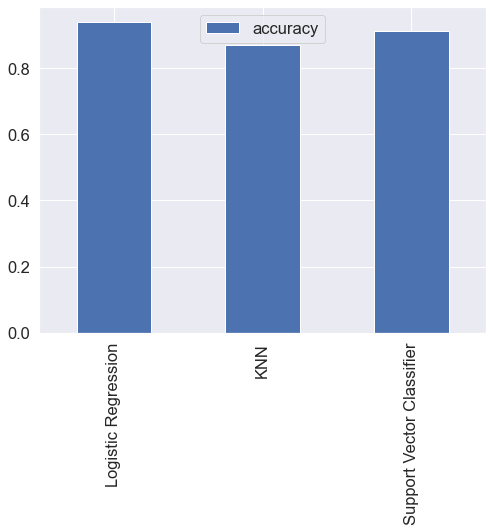

In [28]:
model_compare.T.plot.bar(figsize=(8,6));

In context to the Breast Cancer Classification problem, after application of the 3 different models, we obtain:

Model Name: Accuracy Scores
> **'Logistic Regression' -> 0.9385964912280702**

> **'KNN' -> 0.868421052631579**

> **'Support Vector Classifier' -> 0.9122807017543859**

* Though it is clearly seen, that the Logistic Regression model has the highest accuracy of 93.8 % but considering about the other metrics like precision_score, recall_score and F-1 scores of the different models, in this problem we will aim for higher recall since the `costs of False Negative is very high`.

* In other words, if a patient is actually malignant and the model predicts her to be falling under the category of Benign patient, then there is more risk associated with her health. So, considering the model with the higher recall value of 97 % we will opt 'Support Vector Classifier' as the right model in this problem.